# Age Gender Ethnicity Predictor
![](https://img.freepik.com/premium-vector/large-group-people-different-nationality-ethnicity-age-isolated-white_212216-231.jpg?w=996)

# Introduction 
- **All about Dataset** 
<br>
This dataset includes a CSV of facial images that are labeled on the basis of age, gender, and ethnicity.
The dataset includes 27305 rows and 5 columns. <br>
In this project I will be using this dataset to train and validate deep learning models. As CNNs are best suitable for image processing , so I will be training given images with CNN models. I will be using data augmentation,  batch normalization, learning rate scheduling and some regularization techniques like grad clipping, dropout, etc.

## What is Deep Learning ?
![](https://assets-global.website-files.com/5fb24a974499e90dae242d98/60f6fcbbea40ed333d29932d_5f201fc59a54002670de36a4_5eac2bb7d3cad50315947c84_Untitled-3.jpeg)

Deep learning is a type of machine learning and artificial intelligence (AI) that imitates the way humans gain certain types of knowledge. Deep learning is an important element of data science, which includes statistics and predictive modeling. It is extremely beneficial to data scientists who are tasked with collecting, analyzing and interpreting large amounts of data; deep learning makes this process faster and easier. In deep learning, each level learns to transform its input data into a slightly more abstract and composite representation. In an image recognition application, the raw input may be a matrix of pixels; the first representational layer may abstract the pixels and encode edges; the second layer may compose and encode arrangements of edges; the third layer may encode a nose and eyes; and the fourth layer may recognize that the image contains a face. Importantly, a deep learning process can learn which features to optimally place in which level on its own. This does not eliminate the need for hand-tuning; for example, varying numbers of layers and layer sizes can provide different degrees of abstraction.

## What is CNN?

*The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.*

**READ THIS ARTICLE TO KNOW MORE ABOUT CNN -[CNN](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)**

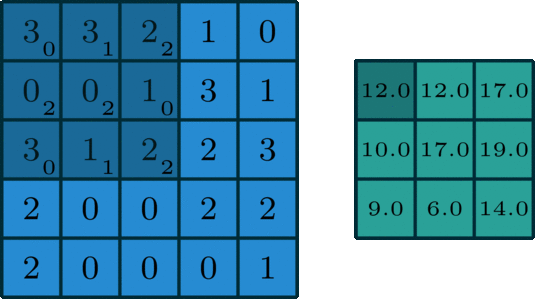

## Importing Required modules

In [88]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [89]:
# Reading the file
import pandas as pd
data_dir="../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv"
raw_df = pd.read_csv(data_dir)
raw_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


So we have age ethnicity gender img_name and pixels as columns. Pixels seem to be image arrays. It's given that thee are greyscale images of size 48 * 48. We donot require image name columns so let's drop it out and perform some operations on pixels column in order to get images in form of 48 * 48 array

In [90]:
raw_df.drop('img_name',axis=1,inplace=True)

In [91]:
pix=raw_df['pixels']
pix[0]

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1

We need to split these pixels and convert them into array and it is provided to us that images are of shape 48*48. Let's apply this operation and then check

In [92]:
## Converting pixels into numpy array
raw_df['pixels']=raw_df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))
raw_df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


We have got images arrays but we need to scale them in range 0 to 255.

In [93]:

raw_df['pixels'] = raw_df['pixels'].apply(lambda x: x/255)


In [94]:
48*48==len(raw_df.pixels[2])

True

So we have got data into right format. Now Let's check how many different ages, genders and ethnicities are there in this data.

In [95]:
print("Unique Gender", raw_df.gender.nunique())
print("Unique Ethnicities", raw_df.ethnicity.nunique())
print("Unique Ages", raw_df.age.nunique())

Unique Gender 2
Unique Ethnicities 5
Unique Ages 104


Let's train one Classification model for Gender and Ethnicities classification and a Regression model for Age prediction.

# Defining Basic Utility Functions
Let's define basic functions which we will be using time and again for different purposes

## Setting up data on a GPU
GPUs are Graphical Processing Units which can very efficiently train Deep Neural Networks. Some online platforms like Kaggle and Google Colab provide us with GPUs for free. All data needs to be shifted  on GPU which you require to be trained with help of it.

In [96]:
# Pick GPU if available else CPU. Availability of GPU can be checked using torch.cuda.is_available()
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
# Move Tensors to GPU
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
# Now Let's wrap a dataloaders to move data to a device
class DeviceDataLoader():
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
    #Yielding a batch of data after moving it to device
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
    # return Number of batches
        return len(self.dl)

device = get_default_device()
device


device(type='cuda')

## General Model Training Functions
Defining object to extend nn.Module class and within that object defining functions for training and validating our models. We are doing this because we will be using same procedure to train and evaluate our models

In [97]:
# Defining a function to return what's the accuracy of our model
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # Label for maximum of probabilities for each row
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)) #fraction predictions that match Target labels

# Extending nn.Module 
class Base(nn.Module):
    # training
    def training_step(self, batch,age=False):
                          
        if not age: 
            images, labels = batch 
            out = self(images) # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
        else: 
            images, targets = batch 
            targets = targets.to(torch.float32)
            out = self(images)
            loss =torch.sqrt(F.mse_loss(out[:,0],targets))
        return loss
    # For validation set
    def validation_step(self, batch,age=False):
                           
        if not age:
            images, labels = batch 
            out = self( images)  # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
            acc = accuracy(out, labels)           # Calculate accuracy
            return {'val_loss': loss.detach(), 'val_acc': acc}
        else: 
            images, targets = batch 
            out = self(images)
            loss =torch.sqrt(F.mse_loss(out[:,0],targets)) # Calculate loss
            
              
        return {'val_loss': loss.detach()}
    # Stacking batch losses & accuracies and getting average   
    def validation_epoch_end(self, outputs,age=False):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        if not age: 
            batch_accs = [x['val_acc'] for x in outputs]
            epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
            return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result,age=False):
        if not age:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        else:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss']))

Defining function to evaluating model on validation set initially. This function would be helpful if we want to evaluate a test set. 

In [98]:
@torch.no_grad()
def evaluate(model, val_loader,age=False):
    model.eval()
    outputs = [model.validation_step(batch,age=age) for batch in val_loader]
    return model.validation_epoch_end(outputs,age=age)

Now let's define function for finally training our model that would call training step function. This function will get train loss and apply grdient descent and other optimizations like weight decay, gradient clipping and lr scheduler. Finally function should evaluate the model based on what it has learnt till that epoch.

In [99]:
# Function to get the lr for each epoch so that we can take a look over it as well
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# This function will applies all our optimization strategies and stores all losses / lr /accuracies achieved after each epoch    
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD,age=False): # using Schocatic Gradient Descent optimizer
    torch.cuda.empty_cache() # deleting cache
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch,age=age)
            train_losses.append(loss)
            
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad() # no previous gradient get further used.
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader,age=age)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result,age=age) # This will print all losses and accuracy obtained after each epoch
        history.append(result) # Saving this result into a list
    return history # returning results after all epochs

## Defining convolution Blocks

In [100]:
#Let's defining function for doing optimization after each convolution layer
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), #Convolution layer
              nn.BatchNorm2d(out_channels), # Batch normalization, to help model generalize and learn better
              nn.ReLU(inplace=True)] # Activation function introduction of non linearity
    if pool: 
        layers.append(nn.MaxPool2d(2)) # Maxpooling if required
    return nn.Sequential(*layers) 

## Functions for Creating Datasets, Data Loaders & Data Augmentation (transforms).

In [101]:
def create_ds(ge_df,age=False):
    if not age:
        ge=np.array(ge_df['EncodedGE'].tolist())
    else: 
        ge=np.array(ge_df['age'].tolist())
    X = np.array(ge_df['pixels'].tolist())
    Y = X.reshape(X.shape[0],1,48,48)
    images=torch.from_numpy(Y)
    labels=torch.from_numpy(ge)
    ds=TensorDataset(images,labels)
    return ds

In [102]:
def create_dl(ds,batch_size=100,val=False):
    if val: dl = DataLoader(ds, batch_size*2, shuffle=False, num_workers=2, pin_memory=True)     
    else: dl = DataLoader(ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
    return dl

In [151]:
# functions for getting mean and stanrd deviation across all channels in order to use them for normalizing data
def get_mean_std(dl):
    ch_sum, ch_sq_sum, num_batches = 0, 0, 0
    for data,_ in dl:
        ch_sum += torch.mean(data, dim=[0,2,3])
        ch_sq_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    mean = ch_sum/num_batches
    std = (ch_sq_sum/num_batches - mean**2)**0.5
    return mean, std

In [104]:
def get_stats(ds,b_size=100,val=False):
    if val: dl = DataLoader(ds, b_size*2, shuffle=False, num_workers=2, pin_memory=True)     
    else: dl = DataLoader(ds, b_size, shuffle=True, num_workers=2, pin_memory=True)
    stats=(4.5)
    stats =get_mean_std(dl)
    return stats

In [105]:
# Applying Data augmentations
def apply_transforms(train_ds,val_ds,train=True):
    val_stats=get_stats(val_ds,val=True)
    val_tfms = tt.Compose([ tt.Normalize(*val_stats)])
    val_ds.transform=val_tfms
    if train:
        train_stats =get_stats(train_ds)
        train_tfms = tt.Compose([tt.RandomCrop(48, padding=4, padding_mode='reflect'), 
                                 tt.RandomHorizontalFlip(), 
                                 tt.RandomRotation(13),
                                 tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                 tt.Normalize(*train_stats,inplace=True)])
        train_ds.transform=train_tfms
        return train_ds,val_ds
    return val_ds

## Functions for showing and prdicting images.

In [106]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 1, 1, 1)
    stds = torch.tensor(stds).reshape(1, 1, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        #denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1)) # in order to give img in format matplotlib requires 
        break

In [107]:
# function to predict single images  after model has been trained
def predict_image(img, model,age=False):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    if not age:
       # Pick index with highest probability
        _, preds  = torch.max(yb, dim=1)
        # Retrieve the class label
        return [preds[0].item()]
    else:
        return(yb)

## Functions for predicting accuracy for subclasses

In [108]:
def get_subclass_preds(sclass,val_df,model):
    dfs,allpreds=[],[]
    uniques=val_df[sclass].unique()
    uniques.sort()
    for _ in uniques :
        sub_df=val_df[val_df[sclass]==_]
        dfs.append(sub_df)     
    for _ in range(len(dfs)):
        ds=create_ds(dfs[_])
        ds=apply_transforms(0,ds,train=False)
        preds=[]
        for _ in range(len(ds)):
            img, label = ds[_]
            pred= predict_image(img, model)
            preds+=pred
        allpreds.append(preds)
    
    for _ in range(len(allpreds)):
            if sclass=='gender':
                if _==0: print(f"Accuracy for {sclass} {_} :", sum(i < 5 for i in allpreds[_])/len(allpreds[_]))
                else: print(f"Accuracy for {sclass} {_} :", sum(i > 4 for i in allpreds[_])/len(allpreds[_]))
            elif sclass=='ethnicity':
                if _>4: return
                print(f"Accuracy for {sclass} {_} :", sum(i ==_ or i==_+5 for i in allpreds[_])/len(allpreds[_]))
    return allpreds  # just in case we want to plot and compare         

In [109]:
def get_subclass_age_rmse(val_df,model,Range):
    dfs,allpreds=[],[]
    val_df['agegroup']=val_df['age']//Range
    uniques=val_df['agegroup'].unique()
    uniques.sort()
    for _ in uniques :
        sub_df=val_df[val_df['agegroup']==_]
        dfs.append(sub_df)     
    for _ in range(len(dfs)):
        ds=create_ds(dfs[_],age=True)
        ds=apply_transforms(0,ds,train=False)
        preds=[]
        for i in range(len(ds)):
            img, label = ds[i]
            pred= predict_image(img, model,age=True)
            pred=pred.detach()
            preds+=pred
       # allpreds.append(preds)
        dl=create_dl(ds,val=True)
        dl = DeviceDataLoader(dl, device)
        l_limit,u_limit=(_)*Range,(_+1)*Range
        print(f"RMSE for age group {l_limit} to {u_limit} :", evaluate(model, dl,age=True))
        print(f"Accuracy for age group {l_limit} to {u_limit} :",round((sum(x < u_limit and x >=l_limit for x in preds)/len(preds)).item(),2))
    

# Model for Gender and Ethnicity

In [21]:
# Let's check for many images do we have for each set of gender-ethnicity
ge_df=raw_df.groupby(['gender','ethnicity']).count()
ge_df

age  pixels
gender ethnicity              
0      0          5477    5477
       1          2318    2318
       2          1575    1575
       3          2261    2261
       4           760     760
1      0          4601    4601
       1          2208    2208
       2          1859    1859
       3          1714    1714
       4           932     932

Now as we can get unique values by just concatenating gender and ethnicity values, we should perform this operation and make a new column. Then we can label encode this column to get final targets that we would provide to models

In [21]:
raw_df['GenderEthnicity'] = raw_df.gender.astype(str) + raw_df.ethnicity.astype(str)
encoder=LabelEncoder()
raw_df['EncodedGE']=encoder.fit_transform(raw_df['GenderEthnicity'])

In [22]:
px.histogram(raw_df,'EncodedGE',title='Count of images for each target')

We have very less number of images for target 4 and 9 i.e. 760 and 932. Also we have large number of images for target 0 and 5. This is skewed distribution. So least we can do is randomly under sample of images for majority targets in training set.

In [23]:
# Separating ~ 15 % of data as validation set
x=len(raw_df)
val_df=raw_df.sample(x//7,random_state=40)

In [24]:
# preparing training set
train_df=raw_df.copy()
train_df.drop(val_df.index,inplace=True)


In [25]:
#undersampling operation
train_df.reset_index(drop=True)
train_df=train_df[['EncodedGE','pixels']]
ge_df = pd.DataFrame(columns=['EncodedGE','pixels'])
for _ in train_df.EncodedGE.unique():
    if len(train_df[train_df.EncodedGE==_])>2000:
        if len(train_df[train_df.EncodedGE==_])>2500:
            x=train_df[train_df.EncodedGE==_].sample(2300).copy()
        else: x=train_df[train_df.EncodedGE==_].sample(2000).copy()
        ge_df=pd.concat([ge_df, x], axis=0)
        del x
    else:
        x=train_df[train_df.EncodedGE==_].copy()
        ge_df=pd.concat([ge_df, x], axis=0)
        del x

In [26]:
ge_df

,EncodedGE,pixels
0,2,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,2,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,2,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,2,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,2,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."
...,...,...
23644,6,"[0.13725491, 0.18431373, 0.26666668, 0.2901961..."
23649,6,"[0.7176471, 0.43137255, 0.4509804, 0.40392157,..."
23685,6,"[0.7607843, 0.63529414, 0.5647059, 0.57254905,..."
23688,6,"[0.6901961, 0.6901961, 0.6901961, 0.67058825, ..."


In [33]:
train_ds=create_ds(ge_df)
val_ds=create_ds(val_df)

images.shape: torch.Size([1, 48, 48])
tensor(2)


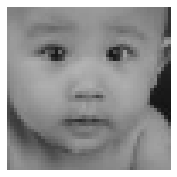

In [34]:
# Let's print an image and it's label from train ds
for images, labels in train_ds:
    print('images.shape:', images.shape)
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=2).permute((1, 2, 0)))
    print(labels)
    break

In [37]:
train_ds,val_ds=apply_transforms(train_ds,val_ds) # Applying transforms to datasets

# creating train and validation loaders
train_dl = create_dl(train_ds)  
valid_dl = create_dl(val_ds,val=True)

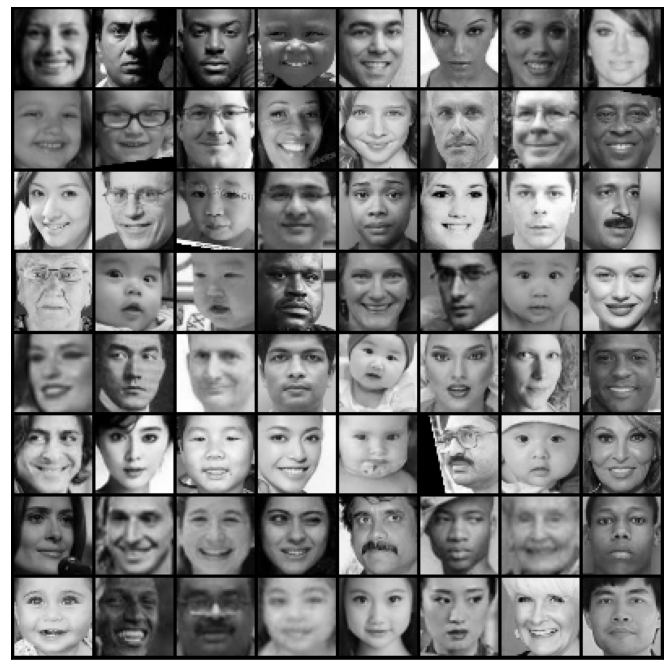

In [38]:
#Let's take look at 1st batch of train data loader
show_batch(train_dl) 

In [39]:
# Shifting Data Loaders to GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Defining RESNET-9 Model

In [40]:
# Extending our Base class and defining resnet9 architecture
class ResNet9(Base):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 200)
        self.conv2 = conv_block(200, 100, pool=True)
        self.res1 = nn.Sequential(conv_block(100,100), conv_block(100,100))
        
        self.conv3 = conv_block(100, 190, pool=True)
        self.conv4 = conv_block(190, 360, pool=True)
        self.res2 = nn.Sequential(conv_block(360, 360), conv_block(360, 360))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(360, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [41]:
# Shifting model to GPU
model = to_device(ResNet9(1, 10), device)
model # checking if everythin's fine with our model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(1, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(200, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace

Now we have made our Resnet9 Model and shifted it on GPU. Let's Evaluate model without any training on validation set.

In [42]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.303293466567993, 'val_acc': 0.09770715981721878}]

We got just 9% accuracy. Now Let's train our model providing appropriate hyper parameters

In [43]:
%%time
epochs = 6
max_lr = 0.005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00301, train_loss: 1.7896, val_loss: 1.4918, val_acc: 0.4956
Epoch [1], last_lr: 0.00497, train_loss: 1.2802, val_loss: 1.2591, val_acc: 0.5902
Epoch [2], last_lr: 0.00406, train_loss: 1.0451, val_loss: 1.0119, val_acc: 0.6632
Epoch [3], last_lr: 0.00231, train_loss: 0.8690, val_loss: 0.8676, val_acc: 0.7070
Epoch [4], last_lr: 0.00067, train_loss: 0.6675, val_loss: 0.7696, val_acc: 0.7481
Epoch [5], last_lr: 0.00000, train_loss: 0.4844, val_loss: 0.7803, val_acc: 0.7569
CPU times: user 48.6 s, sys: 29.7 s, total: 1min 18s
Wall time: 1min 18s


<AxesSubplot:ylabel='train_loss'>

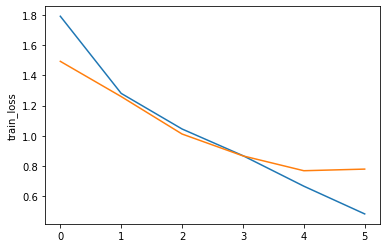

In [44]:
history_df=pd.DataFrame(history)
sns.lineplot(data=history_df,x=history_df.index,y='train_loss' )
sns.lineplot(data=history_df,x=history_df.index,y='val_loss' )
plt.
#sns.lineplot(history_df['val_loss'] )

**Overfitting is clearly visible after 4th epoch, so this model should be stopped after 4th epoch**. This could be easily done using early stopping callback or just training model again with selected lrs.<br>
Now Let's define a function to get how accurate is our model for different types of Ethnicities and Gender. We will be defining a function which will take gender or ethnicity as input and then segregate val_df for all different subtypes. Then make predictions with our model for each class and print accuracy for each class type. 

In [46]:
preds_g=get_subclass_preds('gender',val_df)

Accuracy for gender 0 : 0.9221453287197232
Accuracy for gender 1 : 0.8958837772397095


In [47]:
preds_e=get_subclass_preds('ethnicity',val_df)

Accuracy for ethnicity 0 : 0.8713574982231699
Accuracy for ethnicity 1 : 0.8808446455505279
Accuracy for ethnicity 2 : 0.8936170212765957
Accuracy for ethnicity 3 : 0.8112874779541446
Accuracy for ethnicity 4 : 0.3103448275862069


Our model is doing well in predicting Gender but we get very low accuracy for ethnicity class 4. May be this is because we have very less data for ethnicity 4 or we need to make some changes to our model so that it learns better. But as of now our model predicts all other ethnicities well, so this should not be used to predict ethnicity 4. Also accuracy of model may improve drastically if we remove ethnicity 4 all together.<br>
<br>
So, as of now our model is good to predict gender with accuracy of above 90% and all ethnicities except ethnicity 4 with an accuracy of above 80%.<br>
Now Let's see some predictions by our model on random images in validation dataset

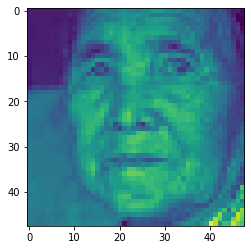

Label: tensor(7) , Predicted: [7]


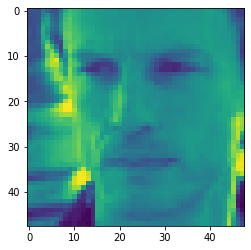

Label: tensor(0) , Predicted: [0]


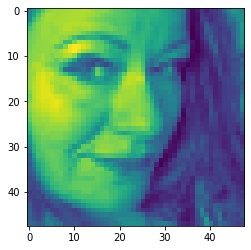

Label: tensor(5) , Predicted: [5]


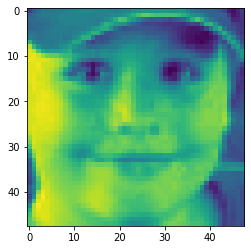

Label: tensor(0) , Predicted: [5]


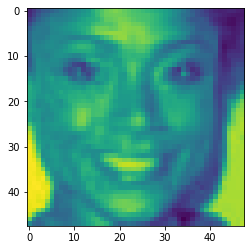

Label: tensor(6) , Predicted: [6]


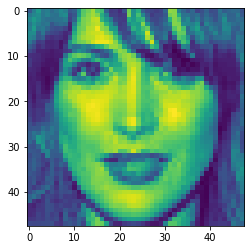

Label: tensor(5) , Predicted: [5]


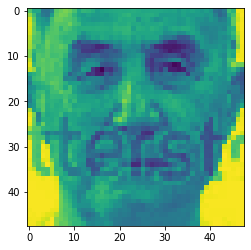

Label: tensor(2) , Predicted: [2]


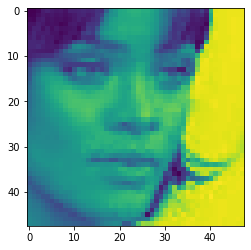

Label: tensor(6) , Predicted: [6]


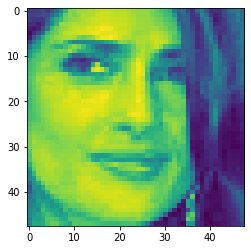

Label: tensor(9) , Predicted: [5]


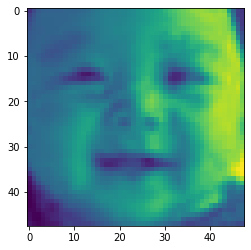

Label: tensor(2) , Predicted: [2]


In [48]:
import random

for i in range(10):
    num1=random.randint(0,300)
    img, label = val_ds[num1]
   # ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    plt.imshow(img.permute(1, 2, 0).clamp(0,1),cmap=)
    plt.show()
    print('Label:', val_ds[num1][1], ', Predicted:', predict_image(img, model))

# Model for Age

In [117]:
# Checking Value counts for all ages
Age_df=raw_df[['age']].value_counts()
Age_df=Age_df.reset_index()
Age_df.rename(columns = {0:'Value_counts'}, inplace = True)
Age_df

,age,Value_counts
0,26,2197
1,1,1123
2,28,918
3,35,880
4,24,859
...,...,...
99,115,3
100,91,2
101,101,2
102,103,1


In [118]:
# Let's check the ranges
for _ in range(100,1100,100):
    print(f"From {_-100} to {_}  :",Age_df[(Age_df.Value_counts<_) & (Age_df.Value_counts>_-100)].shape[0])

From 0 to 100  : 40
From 100 to 200  : 24
From 200 to 300  : 16
From 300 to 400  : 6
From 400 to 500  : 5
From 500 to 600  : 2
From 600 to 700  : 2
From 700 to 800  : 2
From 800 to 900  : 2
From 900 to 1000  : 1


In [119]:
for _ in range(10,104,10):
    print(f"From {_-10} to {_} :",Age_df[(Age_df.Value_counts<_) & (Age_df.Value_counts>_-10)].shape[0])

From 0 to 10 : 11
From 10 to 20 : 4
From 20 to 30 : 4
From 30 to 40 : 5
From 40 to 50 : 0
From 50 to 60 : 2
From 60 to 70 : 3
From 70 to 80 : 1
From 80 to 90 : 3
From 90 to 100 : 4


We need to apply some data imbalance technique to balance our data a bit. Or we should drop ages for which we have very very less count. 

In [120]:
Age_df[Age_df.Value_counts<30].age.min()

77

So we have very low images for ages above 80. We can consider dropping them but let's first visualize age distribution.

In [114]:
px.histogram(raw_df,'age',title='Count of Images vs Age for raw_df')

In [121]:
# We should consider dropping ages above 80
Age_df=raw_df[['age','pixels']]
Age_df=Age_df.query("age<81")

In [123]:
#Checking if we have any missing age
All_ages=[x for x in range(1,81)]
Missing_ages=np.setdiff1d(All_ages,Age_df.age)
Missing_ages

array([], dtype=int64)

In [124]:
# Separating ~ 15 % of data as validation set
x=len(Age_df)
val_df=Age_df.sample(x//7,random_state=40)

In [125]:
# preparing training set
train_df=Age_df.copy()
train_df.drop(val_df.index,inplace=True)


In [126]:
train_df.columns

Index(['age', 'pixels'], dtype='object')

In [127]:
#undersampling operation
train_df.reset_index(drop=True)
train1_df = pd.DataFrame(columns=['age','pixels'])
for _ in train_df.age.unique():
    if len(train_df[train_df.age==_])>400:
        x=train_df[train_df.age==_].sample(400).copy()
        train1_df=pd.concat([train1_df, x], axis=0)
    else: 
        x=train_df[train_df.age==_].copy()
        train1_df=pd.concat([train1_df, x], axis=0)
        del x
    

In [130]:
train_df.age=train_df.age-1
train1_df.age=train1_df.age-1

In [175]:
px.histogram(train_df,'age',title='Count of Images vs Age (below 90)')

In [174]:
px.histogram(train1_df,'age',title='Count of Images vs Age (below 90) after undersampling')

Still data is skewed (though lesser than raw data), so we can expect high losses as ages go beyond 40. 

In [133]:
#Converting to datasets
train_ds=create_ds(train_df,age=True)
val_ds=create_ds(val_df,age=True)
train1_ds=create_ds(train1_df,age=True)
val1_ds=create_ds(val_df,age=True)

images.shape: torch.Size([1, 48, 48])
tensor(0)


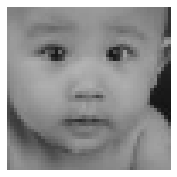

In [134]:
for images, labels in train_ds:
    print('images.shape:', images.shape)
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=2).permute((1, 2, 0)))
    print(labels)
    break

In [135]:
train_ds,val_ds=apply_transforms(train_ds,val_ds,train=True) # applying trnsforms
train1_ds,val1_ds=apply_transforms(train1_ds,val1_ds,train=True) # applying trnsforms

In [136]:
# Creating Dataloaders and shifting them to GPU
train_dl=create_dl(train_ds,batch_size=100,val=False)
val_dl= create_dl(val_ds,batch_size=100,val=False) 
train1_dl=create_dl(train1_ds,batch_size=100,val=False)
val1_dal= create_dl(val1_ds,batch_size=100,val=False) 

In [137]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
train1_dl = DeviceDataLoader(train1_dl, device)
val1_dl = DeviceDataLoader(val1_dl, device)

## Defining RESNET-18 model

In [144]:
class ResNet18(Base):
    def __init__(self, in_channels):
        super().__init__()
        self.conv0=conv_block(in_channels, 64)
        self.res0=nn.Sequential(conv_block(64,64), conv_block(64,64))
        self.res1 = nn.Sequential(conv_block(64,64), conv_block(64,64))
        self.conv1 = conv_block(64, 128)
        self.conv2 = conv_block(128, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256,256), conv_block(256,256))
        
        self.conv3 = conv_block(256, 450)
        self.conv4 = conv_block(450, 512,pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        #self.dense_out = nn.Linear(in_features=hidden_size, out_features=1)
        
        self.conv5 = conv_block(512, 72)
        self.conv6 = conv_block(72, 250,pool=True)
        self.res4 = nn.Sequential(conv_block(250,250), conv_block(250,250))
        
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(250, 1))
        
    def forward(self, xb):
        out = self.conv0(xb)
        out = self.res0(out) + out
        out = self.res1(out) + out
        out = self.conv1(out)
        out = self.conv2(out)
        out = self.res2(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res3(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res4(out) + out
        out = self.classifier(out)
        return out

In [145]:
model2 = to_device(ResNet18(1), device)
model2

ResNet18(
  (conv0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res0): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, ke

In [158]:
model21 = to_device(ResNet18(1), device)
model21

ResNet18(
  (conv0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res0): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, ke

## Training without undersampling

In [146]:
history = [evaluate(model2, val_dl,age=True)]
history

[{'val_loss': 37.02414321899414}]

In [147]:
%%time
epochs = 7
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]
history += fit_one_cycle(epochs, max_lr, model2, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func,age=True)
# was for less than 70 age no under sampling

Epoch [0], last_lr: 0.00024, train_loss: 15.1340, val_loss: 11.3559
Epoch [1], last_lr: 0.00050, train_loss: 10.2556, val_loss: 9.0997
Epoch [2], last_lr: 0.00046, train_loss: 8.9483, val_loss: 8.3385
Epoch [3], last_lr: 0.00034, train_loss: 7.9330, val_loss: 8.1328
Epoch [4], last_lr: 0.00018, train_loss: 6.9385, val_loss: 7.3740
Epoch [5], last_lr: 0.00005, train_loss: 5.7432, val_loss: 7.5997
Epoch [6], last_lr: 0.00000, train_loss: 4.6269, val_loss: 7.4959
CPU times: user 3min 29s, sys: 2min 28s, total: 5min 58s
Wall time: 6min 1s


<AxesSubplot:ylabel='train_loss'>

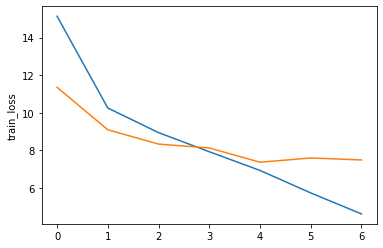

In [148]:
history_df=pd.DataFrame(history)
sns.lineplot(data=history_df,x=history_df.index,y='train_loss' )
sns.lineplot(data=history_df,x=history_df.index,y='val_loss' )
#sns.lineplot(history_df['val_loss'] )

In [171]:
get_subclass_age_rmse(val_df,model2,20)

RMSE for age group 0 to 20 : {'val_loss': 5.2581377029418945}
Accuracy for age group 0 to 20 : 0.73
RMSE for age group 20 to 40 : {'val_loss': 5.556108474731445}
Accuracy for age group 20 to 40 : 0.91
RMSE for age group 40 to 60 : {'val_loss': 9.44606876373291}
Accuracy for age group 40 to 60 : 0.6
RMSE for age group 60 to 80 : {'val_loss': 12.684428215026855}
Accuracy for age group 60 to 80 : 0.49
RMSE for age group 80 to 100 : {'val_loss': 16.428300857543945}
Accuracy for age group 80 to 100 : 0.05


## Training after undersampling majority classes

In [159]:
%%time
epochs = 6
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]
history += fit_one_cycle(epochs, max_lr, model21, train1_dl, val1_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func,age=True)
# with under sampling

Epoch [0], last_lr: 0.00030, train_loss: 18.6067, val_loss: 13.1249
Epoch [1], last_lr: 0.00050, train_loss: 11.0102, val_loss: 12.5571
Epoch [2], last_lr: 0.00041, train_loss: 9.5239, val_loss: 10.1064
Epoch [3], last_lr: 0.00023, train_loss: 8.3485, val_loss: 7.6755
Epoch [4], last_lr: 0.00007, train_loss: 7.1898, val_loss: 7.0335
Epoch [5], last_lr: 0.00000, train_loss: 5.9586, val_loss: 6.6996
CPU times: user 2min 26s, sys: 1min 41s, total: 4min 7s
Wall time: 4min 11s


<AxesSubplot:ylabel='train_loss'>

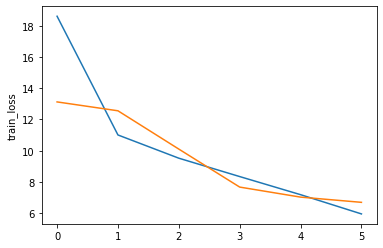

In [160]:
history_df=pd.DataFrame(history)
sns.lineplot(data=history_df,x=history_df.index,y='train_loss' )
sns.lineplot(data=history_df,x=history_df.index,y='val_loss' )
#sns.lineplot(history_df['val_loss'] )

In [170]:
get_subclass_age_rmse(val_df,model21,20)

RMSE for age group 0 to 20 : {'val_loss': 5.465393543243408}
Accuracy for age group 0 to 20 : 0.83
RMSE for age group 20 to 40 : {'val_loss': 6.215913772583008}
Accuracy for age group 20 to 40 : 0.85
RMSE for age group 40 to 60 : {'val_loss': 9.578641891479492}
Accuracy for age group 40 to 60 : 0.61
RMSE for age group 60 to 80 : {'val_loss': 12.382193565368652}
Accuracy for age group 60 to 80 : 0.53
RMSE for age group 80 to 100 : {'val_loss': 14.092890739440918}
Accuracy for age group 80 to 100 : 0.09


So Seems like model(model2) that was trained after undersampling performed a bit well (based on overfitting curve) than the one trained with full data. But model without undersampling has better RMSE for lower age groups while model (model21) trained after undersampling has better RMSE for higher age groups.
<br>
So it will be better to predict images of older people with model21, while images of youngsters should be predicted using model2. <br>
Again there's overfitting happening in both the above models after epoch 4. We should stop training after epoch 4. This would give probably expected results if tested on Real World data as training and validation losses are almost same after epoch 4. 

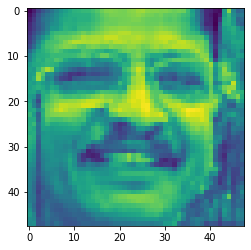

Label: 50 , Predicted: 49.47


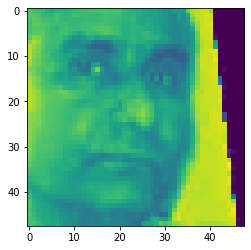

Label: 60 , Predicted: 42.29


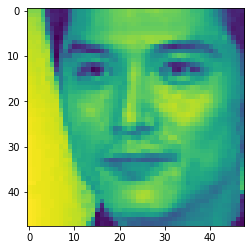

Label: 32 , Predicted: 25.99


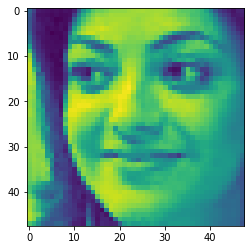

Label: 31 , Predicted: 26.78


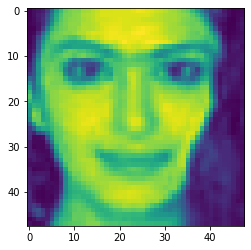

Label: 24 , Predicted: 21.21


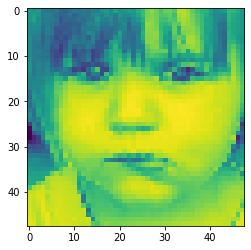

Label: 4 , Predicted: 2.85


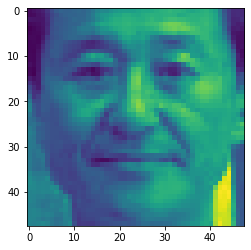

Label: 55 , Predicted: 56.71


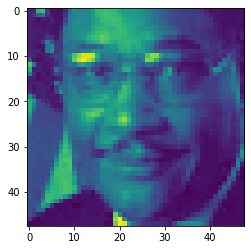

Label: 62 , Predicted: 49.06


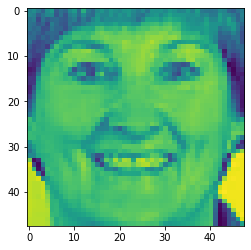

Label: 32 , Predicted: 60.57


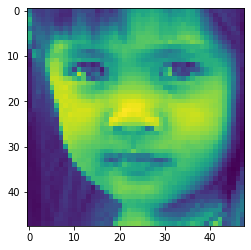

Label: 5 , Predicted: 1.59


In [173]:
import random

for i in range(10):
    num1=random.randint(0,700)
    img, label = val_ds[num1]
   # ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    plt.imshow(img.permute(1, 2, 0).clamp(0,1))
    plt.show()
    pred=predict_image(img, model21,age=True)
    pred=pred.detach()
    print('Label:', val_ds[num1][1].item(), ', Predicted:',round(pred.item(),2))

# Summary
- Successfully trained CNN models on **23k** human images to predict Gender, Ethnicity and Age.
- Got an **accuracy** of **above 90%** for **Gender** prediction.
- Got **average accuracy of above 86%** for all **ethnicities** except Ethnicity 4 (may be due to lesser data for it). Accuracy was **above 80%** for all **ethnicities** except Ethnicity 4.
- Got an **RMSE** of **7** on **Age** prediction. The RMSE increases gradually as ages increase. For ages below 40 years **RMSE obtained is 5.5**.
- Under sampling the data helped models to generalize well on minority classes.
- Used Data Augmentation Techniques,Batch Normalization, Learning Rate Scheduling, Weight Decay, gradient clipping, Relu activations and Dropout to achieve best results.

## Future Work
- As data is very skewed, techniques like overampling the minority class or collect some more data for minority classes can be applied
- Improve the model by adding more layers, reconfiguring layer and playing with hyperparameters and data augmentation techniques.
- Check confusin matrices to give explain our models better
- Can use images from real world to make test our models